In [1]:
import logging
import os
import pandas as pd
import re

from pathlib import Path

%load_ext autoreload
%autoreload 2

# Disable logging of the program in the notebook
os.environ["LOGLEVEL"] = "CRITICAL"

logging.basicConfig()
logging.root.setLevel(logging.INFO)
logging.basicConfig(level=logging.INFO)

logger = logging.getLogger('__main__')
logger.setLevel(os.environ.get("LOGLEVEL", logging.FATAL))

pybooklogger = logging.getLogger('pybook')
pybooklogger.setLevel(logging.DEBUG)

%aimport setup

from setup import *
from tad_help import TadRunner

# Track Layout
Calculate the layout of the dutch railway system


In [2]:
layout_file =   "../data/prorail/parsed/netherlands-schiphol.json"
layout = Layout(layout_file)

In [3]:
scenario_files = Path("../data/prorail/scenarios/TAD/TheHague")
save_dir = r"C:\Users\erick\Documents\uni\Thesis\delay-replannning\experiments\results\tad"

In [ ]:
path_data = []
for scenario_file in os.listdir(scenario_files):
    tad_exp = TadRunner(layout, scenario_files / scenario_file, save_dir)
    experiments = tad_exp.run("3500", "o", "GV", "ASDZ", timeout=600)
    experiments[0].metadata = {'color': 'Red',   'label': '@SIPP',    'offset': 0, 'linestyle': 3}
    experiments[1].metadata = {'color': 'Blue',  'label': 'FlexSIPP', 'offset': 0, 'linestyle': 3}

    tad_exp.plot(experiments, save="3500o-GV")
    tad_exp.plot([experiments[0]], save="3500o-GV/atsipp")
    tad_exp.plot([experiments[1]], save="3500o-GV/flexsipp")
    path_data.extend(get_path_data(experiments, tad_exp.agent_df, scenario=scenario_file))

path_df = pd.DataFrame(path_data)
path_df.to_csv(save_dir + "/3500o-Gv.csv")

..\data\prorail\scenarios\TAD\TheHague\2025-07-03.json


In [6]:
path_df = pd.read_csv(save_dir + "/3500o-Gv.csv", index_col=0)
path_df

,path,zeta,alpha,beta,delta,label,id,origin,destination,velocity,start_time,endTime,startTimeHuman,endTimeHuman,trainNumber,trainUnitTypes,stops,delay_location,delay_amount,scenario
0,r-Gv|244;r-Gv|1822;r-Laa|1820;r-Laa|1818;r-Gvm...,-inf,442.93,92.27,1328.71,Buffer time,30,LEDN|5a,HNK|1,38.888889,600.0,5280.0,0:10:00,1:28:00,4156,['SNG'],"[{'expected_arrival': 900.0, 'location': 'SSH|...",r-Ledn|1030,0.0,2025-07-03.json
1,r-Gv|244;r-Gv|1822;r-Laa|1820;r-Laa|1818;r-Gvm...,-inf,442.93,192.95,1328.71,Buffer time,30,LEDN|5a,HNK|1,38.888889,600.0,5280.0,0:10:00,1:28:00,4156,['SNG'],"[{'expected_arrival': 900.0, 'location': 'SSH|...",r-Ledn|1030,0.0,2025-07-03.json
2,r-Gv|244;r-Gv|1822;r-Laa|1820;r-Laa|1818;r-Gvm...,-inf,442.93,192.95,1328.71,Buffer time,74,HFD|2,ASD|11a,38.888889,1320.0,2700.0,0:22:00,0:45:00,8156,['SNG'],"[{'expected_arrival': 1620.0, 'location': 'SHL...",r-Hfd_Shl|1776,0.0,2025-07-03.json
3,r-Gv|244;r-Gv|1822;r-Laa|1820;r-Laa|1818;r-Gvm...,-inf,443.03,202.09,1328.61,Buffer time,30,LEDN|5a,HNK|1,38.888889,600.0,5280.0,0:10:00,1:28:00,4156,['SNG'],"[{'expected_arrival': 900.0, 'location': 'SSH|...",r-Ledn|1030,0.0,2025-07-03.json
4,r-Gv|244;r-Gv|1822;r-Laa|1820;r-Laa|1818;r-Gvm...,-inf,443.03,202.09,1328.61,Buffer time,74,HFD|2,ASD|11a,38.888889,1320.0,2700.0,0:22:00,0:45:00,8156,['SNG'],"[{'expected_arrival': 1620.0, 'location': 'SHL...",r-Shl|1088,0.0,2025-07-03.json
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,r-Gv|244;r-Gv|1822;r-Laa|1820;r-Laa|1818;r-Gvm...,-inf,1227.89,819.76,1328.91,Buffer time,4,GVC|9,HLM|1,38.888889,1020.0,3840.0,0:17:00,1:04:00,6340,['SLT'],"[{'expected_arrival': 1200.0, 'location': 'LAA...",r-Gvm|172,0.0,2025-07-21_3.json
792,r-Gv|244;r-Gv|1822;r-Laa|1820;r-Laa|1818;r-Gvm...,-inf,1227.89,819.76,1328.91,Buffer time,42,GVC|11,LLS|3,38.888889,480.0,6900.0,0:08:00,1:55:00,4353,['SLT'],"[{'expected_arrival': 720.0, 'location': 'LAA|...",r-Ledn|1112,0.0,2025-07-21_3.json
793,r-Gv|244;r-Gv|1822;r-Laa|1820;r-Laa|1818;r-Gvm...,-inf,1227.89,827.73,1328.91,Buffer time,4,GVC|9,HLM|1,38.888889,1020.0,3840.0,0:17:00,1:04:00,6340,['SLT'],"[{'expected_arrival': 1200.0, 'location': 'LAA...",r-Gvm|190,0.0,2025-07-21_3.json
794,r-Gv|244;r-Gv|1822;r-Laa|1820;r-Laa|1818;r-Gvm...,-inf,1227.89,827.73,1328.91,Buffer time,42,GVC|11,LLS|3,38.888889,480.0,6900.0,0:08:00,1:55:00,4353,['SLT'],"[{'expected_arrival': 720.0, 'location': 'LAA|...",r-Ledn|1112,0.0,2025-07-21_3.json


In [24]:
allowed_delay = 180

def td_str(td):
    return ':'.join(re.split(r'[:.]+', str(td)) [1:3])

def extract_tipping_point(df):
    def apply_func(df):

        result=df.groupby("Delay Location").agg({
            "beta": "max",
            "Delay Amount": "max",
        })
        # result = result.loc[result['beta'] < 900]
        result["Tipping Point"] = result["beta"].apply(lambda x: td_str(timedelta(seconds=x)))

        def tp_finder(x):
            new_tp = x['beta'] - max(0, x['Delay Amount'] - allowed_delay)
            if new_tp > 0:
                return td_str(timedelta(seconds=new_tp))
            return "-"

        result[f"Tipping Point ({allowed_delay}s)"] = result.apply(tp_finder, axis=1)
        return result.sort_values("Tipping Point", ascending=True).drop(columns=["beta", "Delay Amount"])

    df["Delay Location"] = df["Delay Location"].str.split("|").apply(lambda x: x[0])
    df = df.groupby(by='Train').apply(apply_func, include_groups=False)
    return df

tp_df = path_df.rename(columns={
    "delay_amount": "Delay Amount",
    "delay_location": "Delay Location",
    "trainNumber": "Train",
    "scenario": "Scenario",
    "label": "Label",
})

tp_df["Scenario"] = tp_df["Scenario"].apply(lambda x: x.split(".")[0])
tp_df = tp_df.groupby(["Scenario"]).apply(extract_tipping_point, include_groups=False)
tp_df = tp_df.loc[tp_df.index.get_level_values('Train').astype(str).str.startswith("43")]
tp_df = tp_df.loc[tp_df.index.get_level_values('Delay Location').astype(str).str.contains("Ledn")]
tp_df.to_latex(save_dir + "/3500o-Gv.tex", escape=True)
tp_df

Tipping Point Tipping Point (180s)
Scenario     Train Delay Location                                   
2025-07-03   4363  r-Ledn                 06:17                06:17
2025-07-04_1 4337  r-Hfd_Ledn             08:42                08:42
                   r-Ledn                 09:32                09:32
2025-07-08_2 4361  r-Ledn                 05:57                05:57
2025-07-08_4 4379  r-Ledn                 13:45                13:45
                   r-Hfd_Ledn             15:06                13:09
2025-07-18_1 4334  r-Hfd_Ledn             13:48                13:48
             4343  r-Ledn                 07:18                07:18
                   r-Hfd_Ledn             16:10                16:10
2025-07-18_2 4350  r-Ledn                 04:18                04:18
2025-07-21_3 4353  r-Ledn                 13:47                13:47

In [26]:
dfs_04_1 = path_df.loc[path_df["scenario"].str.contains("2025-07-04_1")].loc[path_df["trainNumber"].astype(str).str.startswith("43")]
dfs_04_1

,path,zeta,alpha,beta,delta,label,id,origin,destination,velocity,start_time,endTime,startTimeHuman,endTimeHuman,trainNumber,trainUnitTypes,stops,delay_location,delay_amount,scenario
22,r-Gv|244;r-Gv|1822;r-Laa|1820;r-Laa|1818;r-Gvm...,-inf,483.66,489.06,1328.61,Buffer time,27,GVC|11,LLS|3,38.888889,960.0,7980.0,0:16:00,2:13:00,4337,['SLT'],"[{'expected_arrival': 1140.0, 'location': 'LAA...",r-Hfd_Ledn|1986,0.00000,2025-07-04_1.json
23,r-Gv|244;r-Gv|1822;r-Laa|1820;r-Laa|1818;r-Gvm...,-inf,489.06,491.69,1328.61,Buffer time,27,GVC|11,LLS|3,38.888889,960.0,7980.0,0:16:00,2:13:00,4337,['SLT'],"[{'expected_arrival': 1140.0, 'location': 'LAA...",r-Hfd_Ledn|1986,2.62412,2025-07-04_1.json
24,r-Gv|244;r-Gv|1822;r-Laa|1820;r-Laa|1818;r-Gvm...,-inf,491.69,496.66,1328.61,Buffer time,27,GVC|11,LLS|3,38.888889,960.0,7980.0,0:16:00,2:13:00,4337,['SLT'],"[{'expected_arrival': 1140.0, 'location': 'LAA...",r-Ledn|1992,0.00000,2025-07-04_1.json
25,r-Gv|244;r-Gv|1822;r-Laa|1820;r-Laa|1818;r-Gvm...,-inf,505.65,513.75,1328.73,Buffer time,4,AMPO|1,GVC|11,38.888889,180.0,5580.0,0:03:00,1:33:00,4328,['SLT'],"[{'expected_arrival': 600.0, 'location': 'WP|6...",r-Hfd|1150,0.00000,2025-07-04_1.json
31,r-Gv|244;r-Gv|1822;r-Laa|1820;r-Laa|1818;r-Gvm...,-inf,483.66,489.06,1328.61,Recovery time,27,GVC|11,LLS|3,38.888889,960.0,7980.0,0:16:00,2:13:00,4337,['SLT'],"[{'expected_arrival': 1140.0, 'location': 'LAA...",r-Hfd_Ledn|1986,0.00000,2025-07-04_1.json
32,r-Gv|244;r-Gv|1822;r-Laa|1820;r-Laa|1818;r-Gvm...,-inf,489.06,491.69,1328.61,Recovery time,27,GVC|11,LLS|3,38.888889,960.0,7980.0,0:16:00,2:13:00,4337,['SLT'],"[{'expected_arrival': 1140.0, 'location': 'LAA...",r-Hfd_Ledn|1984,4.97650,2025-07-04_1.json
33,r-Gv|244;r-Gv|1822;r-Laa|1820;r-Laa|1818;r-Gvm...,-inf,491.69,507.71,1328.61,Recovery time,27,GVC|11,LLS|3,38.888889,960.0,7980.0,0:16:00,2:13:00,4337,['SLT'],"[{'expected_arrival': 1140.0, 'location': 'LAA...",r-Ledn|1992,0.00000,2025-07-04_1.json
34,r-Gv|244;r-Gv|1822;r-Laa|1820;r-Laa|1818;r-Gvm...,-inf,507.71,508.31,1328.61,Recovery time,27,GVC|11,LLS|3,38.888889,960.0,7980.0,0:16:00,2:13:00,4337,['SLT'],"[{'expected_arrival': 1140.0, 'location': 'LAA...",r-Hfd_Ledn|1980,0.00000,2025-07-04_1.json
35,r-Gv|244;r-Gv|1822;r-Laa|1820;r-Laa|1818;r-Gvm...,-inf,508.31,511.36,1328.61,Recovery time,27,GVC|11,LLS|3,38.888889,960.0,7980.0,0:16:00,2:13:00,4337,['SLT'],"[{'expected_arrival': 1140.0, 'location': 'LAA...",r-Hfd_Ledn|1980,0.00000,2025-07-04_1.json
36,r-Gv|244;r-Gv|1822;r-Laa|1820;r-Laa|1818;r-Gvm...,-inf,511.36,516.36,1328.61,Recovery time,27,GVC|11,LLS|3,38.888889,960.0,7980.0,0:16:00,2:13:00,4337,['SLT'],"[{'expected_arrival': 1140.0, 'location': 'LAA...",r-Hfd_Ledn|1980,0.00000,2025-07-04_1.json


In [14]:
df = tad_exp.agent_df
df.loc[df["id"] == 50]

,id,origin,destination,velocity,start_time,endTime,startTimeHuman,endTimeHuman,trainNumber,trainUnitTypes,stops
49,50,HAD|1,ASD|2,38.888889,480.0,1800.0,0:08:00,0:30:00,2150,[VIRM],"[{'expected_arrival': 780.0, 'location': 'HLM|..."


In [15]:
df.loc[df["id"] == 51]

,id,origin,destination,velocity,start_time,endTime,startTimeHuman,endTimeHuman,trainNumber,trainUnitTypes,stops
50,51,RTD|7,ASD|10a,38.888889,3180.0,7620.0,0:53:00,2:07:00,3267,[VIRM],"[{'expected_arrival': 3840.0, 'location': 'DT|..."


# Experiment Runtime
Take a route of an agent with many stops, and run from start to every stop as an experiment

## Results


### ATF Plot

### Blocking staircase diagram
Showing the route of the agent with the most stops, its quite long.


C:\Users\erick\Documents\uni\Thesis\delay-replannning\generation\safe_interval_graph.py:139: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(timedelta(seconds=ytick)) for ytick in ax.get_yticks()])


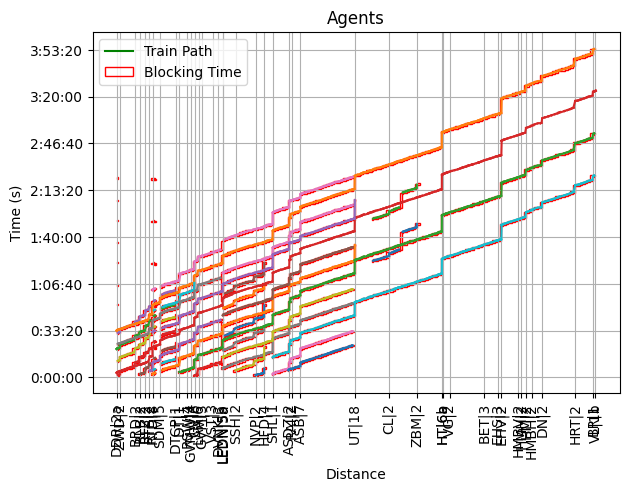

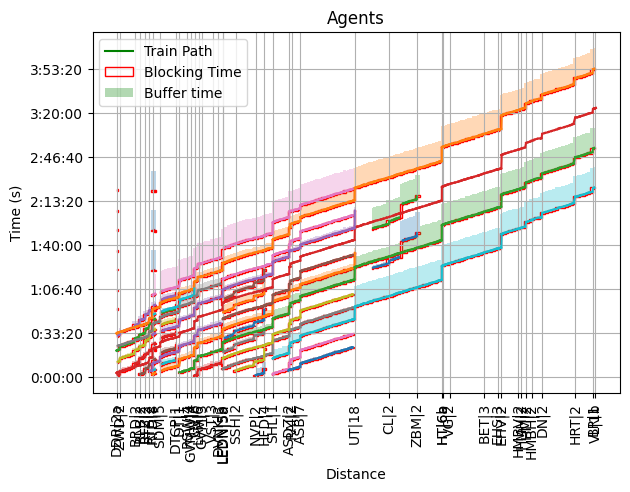

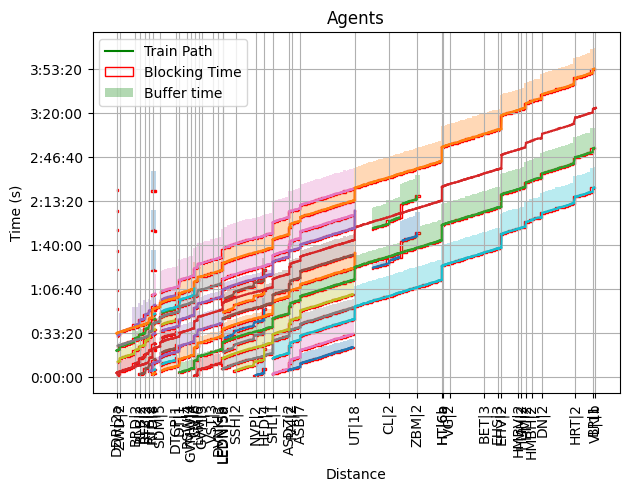

In [109]:
for exp in experiments:
    exp.s.plot(agent_id, exp.block_intervals, exp.buffer_times, exp.recovery_times, True)

### Time statistics

In [112]:
def sum_cols(df1, cols, name):
    df2 = df1.drop(columns=cols)
    df2[name] = df1[cols].sum(axis=1)
    return df2

time_df = pd.DataFrame([exp.get_running_time() for exp in experiments], index=[exp.metadata['label'] for exp in experiments])

setup_cols = ["track graph creation", "routing graph creation"]
recompute_cols = ["unsafe interval generation", "safe interval generation", "bt and crt generation", "converting routes to blocks"]
search_cols = ["FlexSIPP search time"]

time_df = sum_cols(time_df, setup_cols, "Setup Time")
time_df = sum_cols(time_df, recompute_cols, "Recompute Time")
time_df = sum_cols(time_df, search_cols, "Search Time")
time_df

,Setup Time,Recompute Time,Search Time
No flexibility,67.438534,236.065050,7.293
Buffer time,67.438534,235.538854,14.993
Recovery time,67.438534,235.782153,15.619


### Search Node Statistics


In [113]:
nodes_df = pd.DataFrame([exp.get_complexity() for exp in experiments], index=[exp.metadata['label'] for exp in experiments])

nodes_df

,nodes generated,nodes decreased,nodes expanded
No flexibility,346,53,137
Buffer time,441,59,215
Recovery time,534,33,270


### Output paths found


In [114]:
for key, value in experiments[2].results[3].items():
    delayed_trains = {i: v for i,v in enumerate(value[0][4]) if float(v[0]) > 0}
    print(f"{key.replace('r-', '')}\nearliest departure: {int(min(float(value[0][1]), float(value[0][2])) / 60)}\ndepart before: {int(float(value[0][2]) / 60)}\narrive at: {int((float(value[0][1]) + float(value[0][3])) / 60)}\ndelays trains: {delayed_trains}")

Gv|244;Gv|1822;Laa|1820;Laa|1818;Gvm|190;Gvm|170;Gvm|866;Gvm_Ledn|856;Gvm_Ledn|846;Gvm_Ledn|836;Gvm_Ledn|826;Gvm_Ledn|816;Gvm_Ledn|806;Ledn|1114;Ledn|1066;Ledn|1030;Ledn|1992;Hfd_Ledn|1990;Hfd_Ledn|1986;Hfd_Ledn|1984;Hfd_Ledn|1982;Hfd_Ledn|1980;Hfd_Ledn|1978;Hfd_Ledn|1976;Hfd_Ledn|1974;Hfd_Ledn|1972;Hfd_Ledn|1970;Hfd|1232;Hfd|1212;Hfd|1152;Hfd|1138;Hfd|1118;Hfd_Shl|1776;Hfd_Shl|1762;Shl|1086;Shl|1068;Shl|1062;Shl|1032;Asra_Shl|1740;Asra_Shl|1726;Asra|1308;Asra|1024;Asdzo|704;Asdzo|1404;Asdzo|744;Asdzo|764
earliest departure: 42
depart before: 42
arrive at: 64
delays trains: {56: ['209.505', '233.691', '1437.12'], 72: ['210.852', '235.038', '2012.68']}
Gv|244;Gv|1822;Laa|1820;Laa|1818;Gvm|190;Gvm|170;Gvm|866;Gvm_Ledn|856;Gvm_Ledn|846;Gvm_Ledn|836;Gvm_Ledn|826;Gvm_Ledn|816;Gvm_Ledn|806;Ledn|1114;Ledn|1066;Ledn|1030;Ledn|1992;Hfd_Ledn|1990;Hfd_Ledn|1986;Hfd_Ledn|1984;Hfd_Ledn|1982;Hfd_Ledn|1980;Hfd_Ledn|1978;Hfd_Ledn|1976;Hfd_Ledn|1974;Hfd_Ledn|1972;Hfd_Ledn|1970;Hfd|1232;Hfd|1212;Hfd|115

### Path statistics


In [115]:
for exp in experiments:
    print(f"Differend paths found for {exp.metadata['label']}: {sum(exp.results[2].values())}")

Differend paths found for No flexibility: 1
Differend paths found for Buffer time: 1
Differend paths found for Recovery time: 3
